In [1]:
#####========================================= Import Libraries ============================================================

import pandas as pd
import numpy as np
import scipy
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.util import bigrams 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
####==================================Import and read the dataset===========================================================

# Original dataset
df_orig = pd.read_csv("DataSet.csv")
df_orig = pd.DataFrame(df_orig)

# creating a new copy of original dataset for work ahead
df = df_orig

#### =============== Unprocessed data ===========================
print(df.shape)
df.head()

(17880, 18)


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\n<li>Experience with content management s...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\n<p>You...,<h3><b>What you will get from us</b></h3>\n<p>...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\n<p>Valor Services provides Workforc...,"<p>Our client, located in Houston, is actively...",<ul>\n<li>Implement pre-commissioning and comm...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\n<li>\n<b>EDUCATION: </b>Bachelor’s or Ma...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\n<ul>\n<li>RN li...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [3]:
####====================================== Data Preprocessing: ============================================================

##### Steps Involved:

#1) Remove HTML Tags 

#2) Tokenization

#3) Remove Punctuations

#4) Lemmatization

#5) Remove Stopword

### Remove HTML Tags

In [4]:
import re

def remove_html_tags(text):
    return re.sub('<[^<]+?>', '', str(text))


df.company_profile=df.company_profile.apply(remove_html_tags).str.replace('\r\n', '').str.replace('&amp', 'and').str.lower()
df.description=df.description.apply(remove_html_tags).str.replace('\r\n', '').str.replace('&amp', 'and').str.lower()
df.requirements=df.requirements.apply(remove_html_tags).str.replace('\r\n', '').str.replace('&amp', 'and').str.lower()
df.benefits=df.benefits.apply(remove_html_tags).str.replace('\r\n', '').str.replace('&amp', 'and').str.lower()


### Tokenization and Remove Punctuations 


In [5]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['company_profile'] = df['company_profile'].apply(lambda x: tokenizer.tokenize(x))
df['description'] = df['description'].apply(lambda x: tokenizer.tokenize(x))
df['requirements'] = df['requirements'].apply(lambda x: tokenizer.tokenize(x))
df['benefits'] = df['benefits'].apply(lambda x: tokenizer.tokenize(x))


### Lemmatization of Tokens and Stopwords Removal

In [6]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 

def lemma(data):
    
    lemmatized_data = [wordnet_lemmatizer.lemmatize(word) for word in data]
    clean_data = [w for w in lemmatized_data if w not in stop]
    
    return clean_data

df['company_profile'] = df['company_profile'].apply(lambda x: lemma(x))
df['description'] = df['description'].apply(lambda x: lemma(x))
df['requirements'] = df['requirements'].apply(lambda x: lemma(x))
df['benefits'] = df['benefits'].apply(lambda x: lemma(x))



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tanvihindwan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
#cleaned dataset for further analysis 
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"[food52, created, groundbreaking, award, winni...","[food52, fast, growing, james, beard, award, w...","[experience, content, management, system, majo...",[nan],f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"[90, second, world, cloud, video, production, ...","[organised, focused, vibrant, awesome, passion...","[expect, key, responsibility, communicate, cli...","[get, u, part, 90, second, team, gain, experie...",f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,"[valor, service, provides, workforce, solution...","[client, located, houston, actively, seeking, ...","[implement, pre, commissioning, commissioning,...",[nan],f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,"[passion, improving, quality, life, geography,...","[company, esri, environmental, system, researc...","[education, bachelor, master, gi, business, ad...","[culture, anything, corporate, collaborative, ...",f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,"[spotsource, solution, llc, global, human, cap...","[job, title, itemization, review, manager, loc...","[qualification, rn, license, state, texas, dip...","[full, benefit, offered]",f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


# Analyzing frequency distribution of terms for fraud and legit job postings.

In [8]:
## creating a subset of dataframe with features having texual information for our analysis 
df_new = df[["industry", "description", "fraudulent","company_profile","benefits", "requirements"]]
df_new.isnull().sum()
df_new

,industry,description,fraudulent,company_profile,benefits,requirements
0,NaN,"[food52, fast, growing, james, beard, award, w...",f,"[food52, created, groundbreaking, award, winni...",[nan],"[experience, content, management, system, majo..."
1,Marketing and Advertising,"[organised, focused, vibrant, awesome, passion...",f,"[90, second, world, cloud, video, production, ...","[get, u, part, 90, second, team, gain, experie...","[expect, key, responsibility, communicate, cli..."
2,NaN,"[client, located, houston, actively, seeking, ...",f,"[valor, service, provides, workforce, solution...",[nan],"[implement, pre, commissioning, commissioning,..."
3,Computer Software,"[company, esri, environmental, system, researc...",f,"[passion, improving, quality, life, geography,...","[culture, anything, corporate, collaborative, ...","[education, bachelor, master, gi, business, ad..."
4,Hospital & Health Care,"[job, title, itemization, review, manager, loc...",f,"[spotsource, solution, llc, global, human, cap...","[full, benefit, offered]","[qualification, rn, license, state, texas, dip..."
...,...,...,...,...,...,...
17875,Computer Software,"[case, first, time, visited, website, vend, aw...",f,"[vend, looking, awesome, new, talent, come, jo...","[expect, u, open, culture, openly, share, resu...","[ace, role, eat, comprehensive, statement, wor..."
17876,Internet,"[payroll, accountant, focus, primarily, payrol...",f,"[weblinc, e, commerce, platform, service, prov...","[health, wellness, medical, plan, prescription...","[b, b, accounting, desire, fun, love, genuine,..."
17877,NaN,"[experienced, project, cost, control, staff, e...",f,"[provide, full, time, permanent, position, man...",[nan],"[least, 12, year, professional, experience, ab..."
17878,Graphic Design,"[nemsia, studio, looking, experienced, visual,...",f,[nan],"[competitive, salary, compensation, based, exp...","[1, must, fluent, latest, version, corel, adob..."


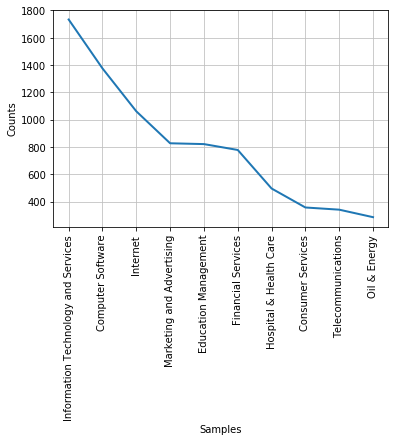

In [9]:
## For EDA we are trying to get insight to Industries for analysing most frequently occurring fraud and legit job 
## description terms.

## First we will check frequency distribution plot to check which industry has more job posting 

data_industry = df_new["industry"]
data_industry = data_industry.dropna()

import nltk
fdist = nltk.FreqDist(data_industry)
fdist.values()
fdist.most_common()
# Top 10 industries visualization
fdist.plot(10)


It can be seen that the Industry- Information Technology and Services has highest numbers of job posts therefore proceeding ahead to check that how the terms vary among legit and fraud job posts.



In [10]:

## referring already above created subset and dropping missing values from it
df_new = df_new.fillna(' ')
df_new.isnull().sum()
df_new = df_new.dropna()

In [11]:
## here we have filtered our subset of dataset with Information Technology and Services as industry 
df_IT = df_new[df_new.industry == "Information Technology and Services"]
df_IT.head()

,industry,description,fraudulent,company_profile,benefits,requirements
8,Information Technology and Services,"[implementation, configuration, testing, train...",f,"[solutions3, woman, owned, small, business, wh...",[nan],"[must, u, citizen, active, sci, clearance, req..."
10,Information Technology and Services,"[position, url_86fd830a95a64e2b30ceed829e63fd3...",f,[nan],"[benefit, fullbonus, eligible, yesinterview, t...","[position, url_86fd830a95a64e2b30ceed829e63fd3..."
52,Information Technology and Services,"[namely, agile, startup, dedicated, building, ...",f,"[namely, leading, end, end, hr, payroll, platf...",[nan],"[qualification, payroll, payroll, tax, process..."
59,Information Technology and Services,"[apcera, revolutionizing, enterprise, technolo...",f,"[land, roll, sleeve, get, done, create, solve,...","[competitive, salary, equity, great, location,...","[responsibility, work, ux, architect, prototyp..."
79,Information Technology and Services,"[raygun, fast, growing, mindscape, product, ur...",f,"[mindscape, wellington, based, software, devel...","[part, fast, growing, company, team, direct, i...","[3, year, experience, project, product, manage..."


In [12]:
# Analysing the lemma token of the description column for fraudulent true values with respect to IT Industry

IT_description_tokens  = df_IT['description']

from collections import Counter

# setting the fraud index to true where fraudulent value is 't' in the dataset  
fraudulent_idx = df_IT['fraudulent'] == "t"

## creating empty arrays for fraudulent and non-fraudulent 
fraudulent_words = []
nonfraudulent_words = []

for items in IT_description_tokens[fraudulent_idx]:
    fraudulent_words.extend(items)    

for items in IT_description_tokens[~fraudulent_idx]:
    nonfraudulent_words.extend(items)
    
## counter function
counter_fraudwords = Counter(fraudulent_words)
counter_nonfraudwords = Counter(nonfraudulent_words)

# print(counter_fraudwords)
# print(counter_nonfraudwords)

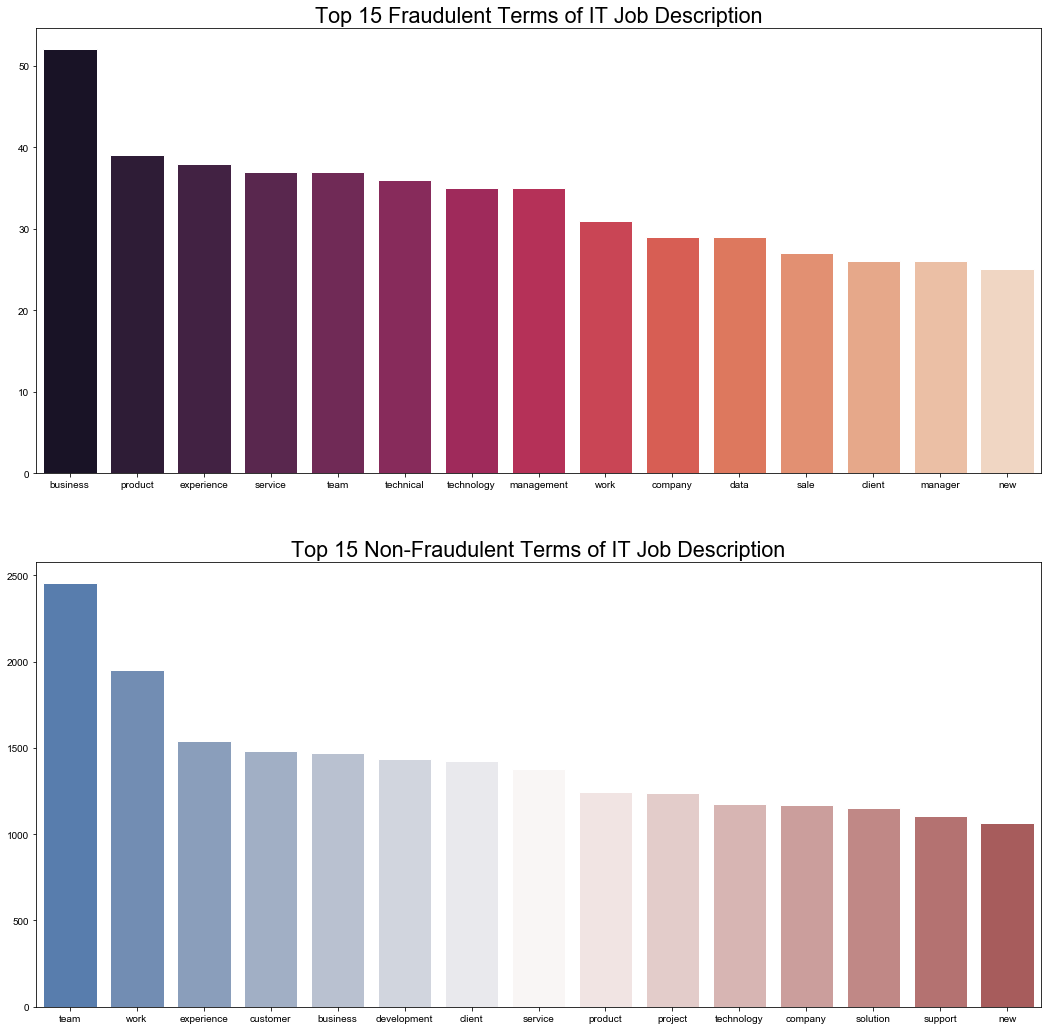

In [13]:
## Visualization of TOP 15 Fraudulent and Non-Fraudulent terms used in IT Job Descriptions ##

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 1, figsize=(18,18))
sns.set(font_scale=1.8)

sns.barplot(x = [items[0] for items in counter_fraudwords.most_common(15)],y = [items[1] for items in counter_fraudwords.most_common(15)], ax=ax[0], palette="rocket")
ax[0].set_title('Top 15 Fraudulent Terms of IT Job Description')

sns.barplot(x = [items[0] for items in counter_nonfraudwords.most_common(15)],y = [items[1] for items in counter_nonfraudwords.most_common(15)], ax=ax[1],palette="vlag")
ax[1].set_title("Top 15 Non-Fraudulent Terms of IT Job Description");



From the above frequency charts of Fraudulent and Non-Fraudulent lemmas it can be seen that outcomes are not that persuasive and are found overlapping with the legit job postings.

# Probability Distribution over sequence of terms used in Fraud and Legit Job     posts using N-grams

In [14]:
# Creating subset of the dataframe where fraudulent is true
fraud  = df_new[df_new.fraudulent == "t"]

In [15]:
# Creating subset of the dataframe where fraudulent is false
legit  = df_new[df_new.fraudulent == "f"]

In [16]:
# Combining all the columns of fraud subset (means where fraudulant is true)
text_fraud = fraud[fraud.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str).str.replace('[', '').str.replace(']', '')),axis=1)

# print(len(text_fraud))
# print(text_fraud.head())

In [17]:
# Combining all the columns of legit subset (means where fraudulant is false)
text_legit = legit[legit.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str).str.replace('[', '').str.replace(']', '')),axis=1)

# print(len(text_legit))
# print(text_legit.head())


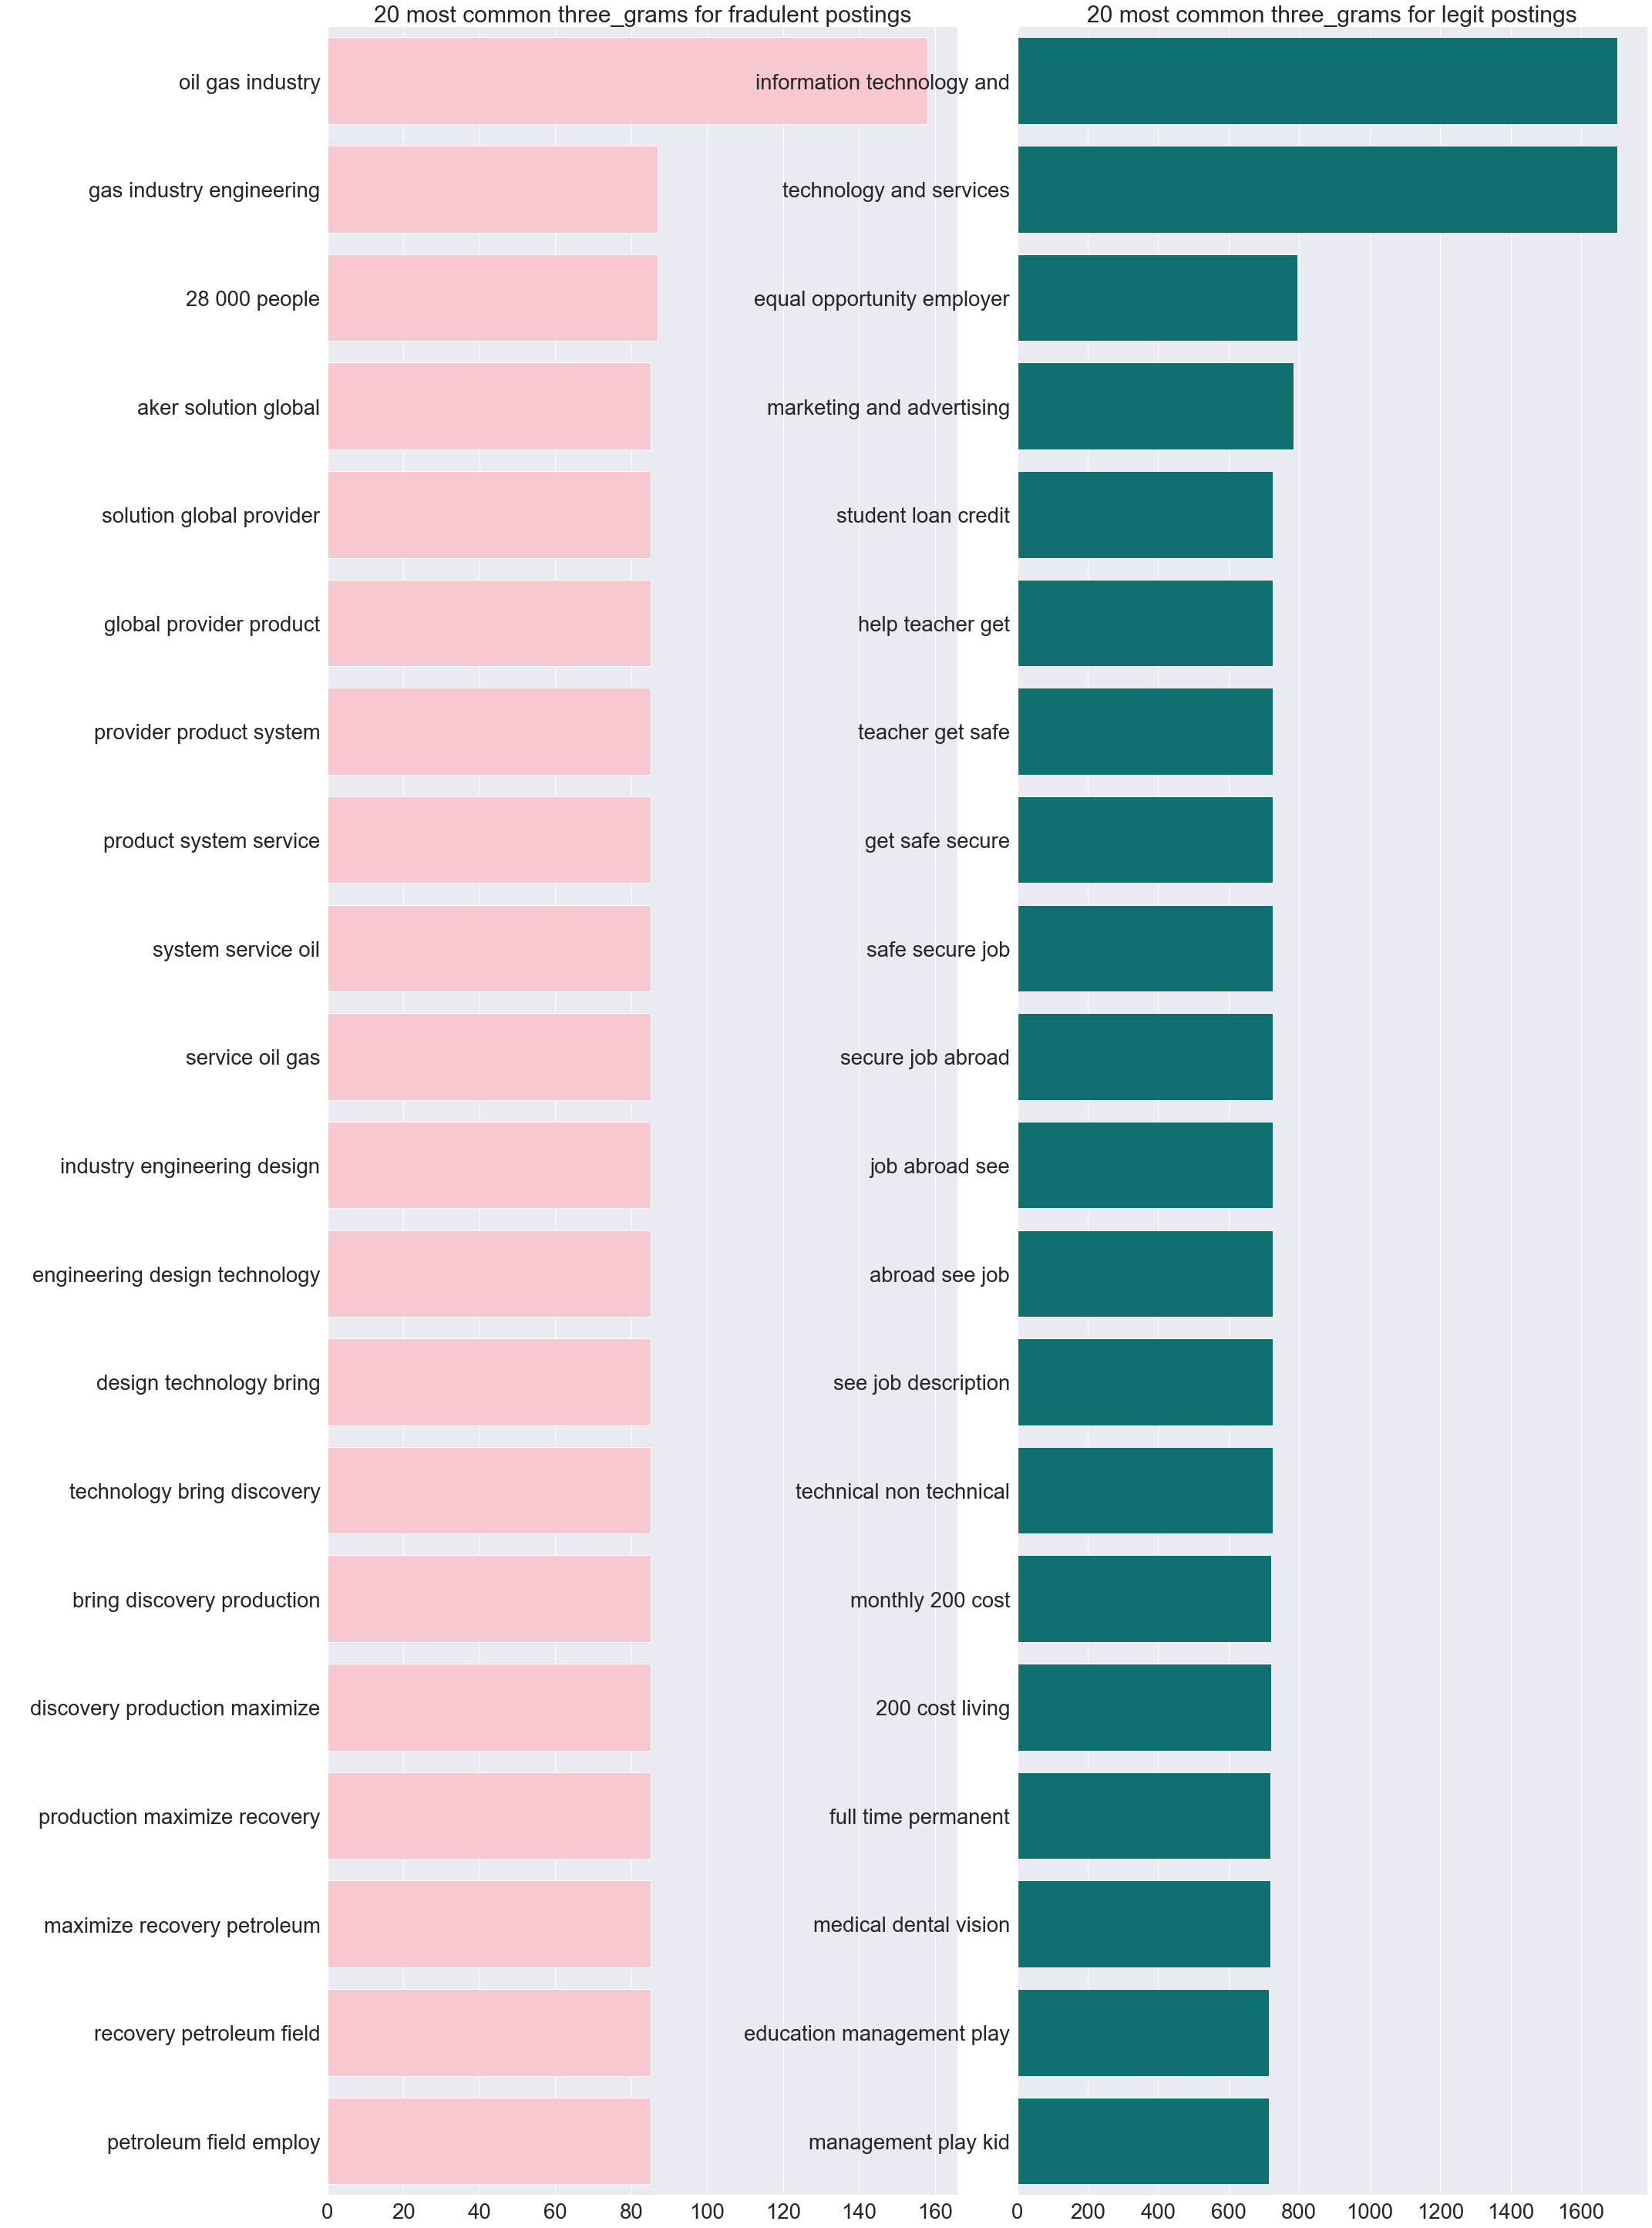

In [20]:
# LANGUAGE MODELING USING N-GRAMS

# Plotting sequence of words using 3-grams

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def three_grams(corpus, n=None):
    cv = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


fig, axes = plt.subplots(ncols=2, figsize=(25, 40))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.tight_layout()
sns.set(font_scale=2.5)

top_threegrams_fraud=three_grams(text_fraud)[:20]
x,y=map(list,zip(*top_threegrams_fraud))
sns.barplot(x=y,y=x, ax=axes[0], color='pink')


top_threegrams_legit=three_grams(text_legit)[:20]
x,y=map(list,zip(*top_threegrams_legit))
sns.barplot(x=y,y=x, ax=axes[1], color='teal')


axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')


axes[0].set_title('20 most common three_grams for fradulent postings')
axes[1].set_title('20 most common three_grams for legit postings')

plt.show()

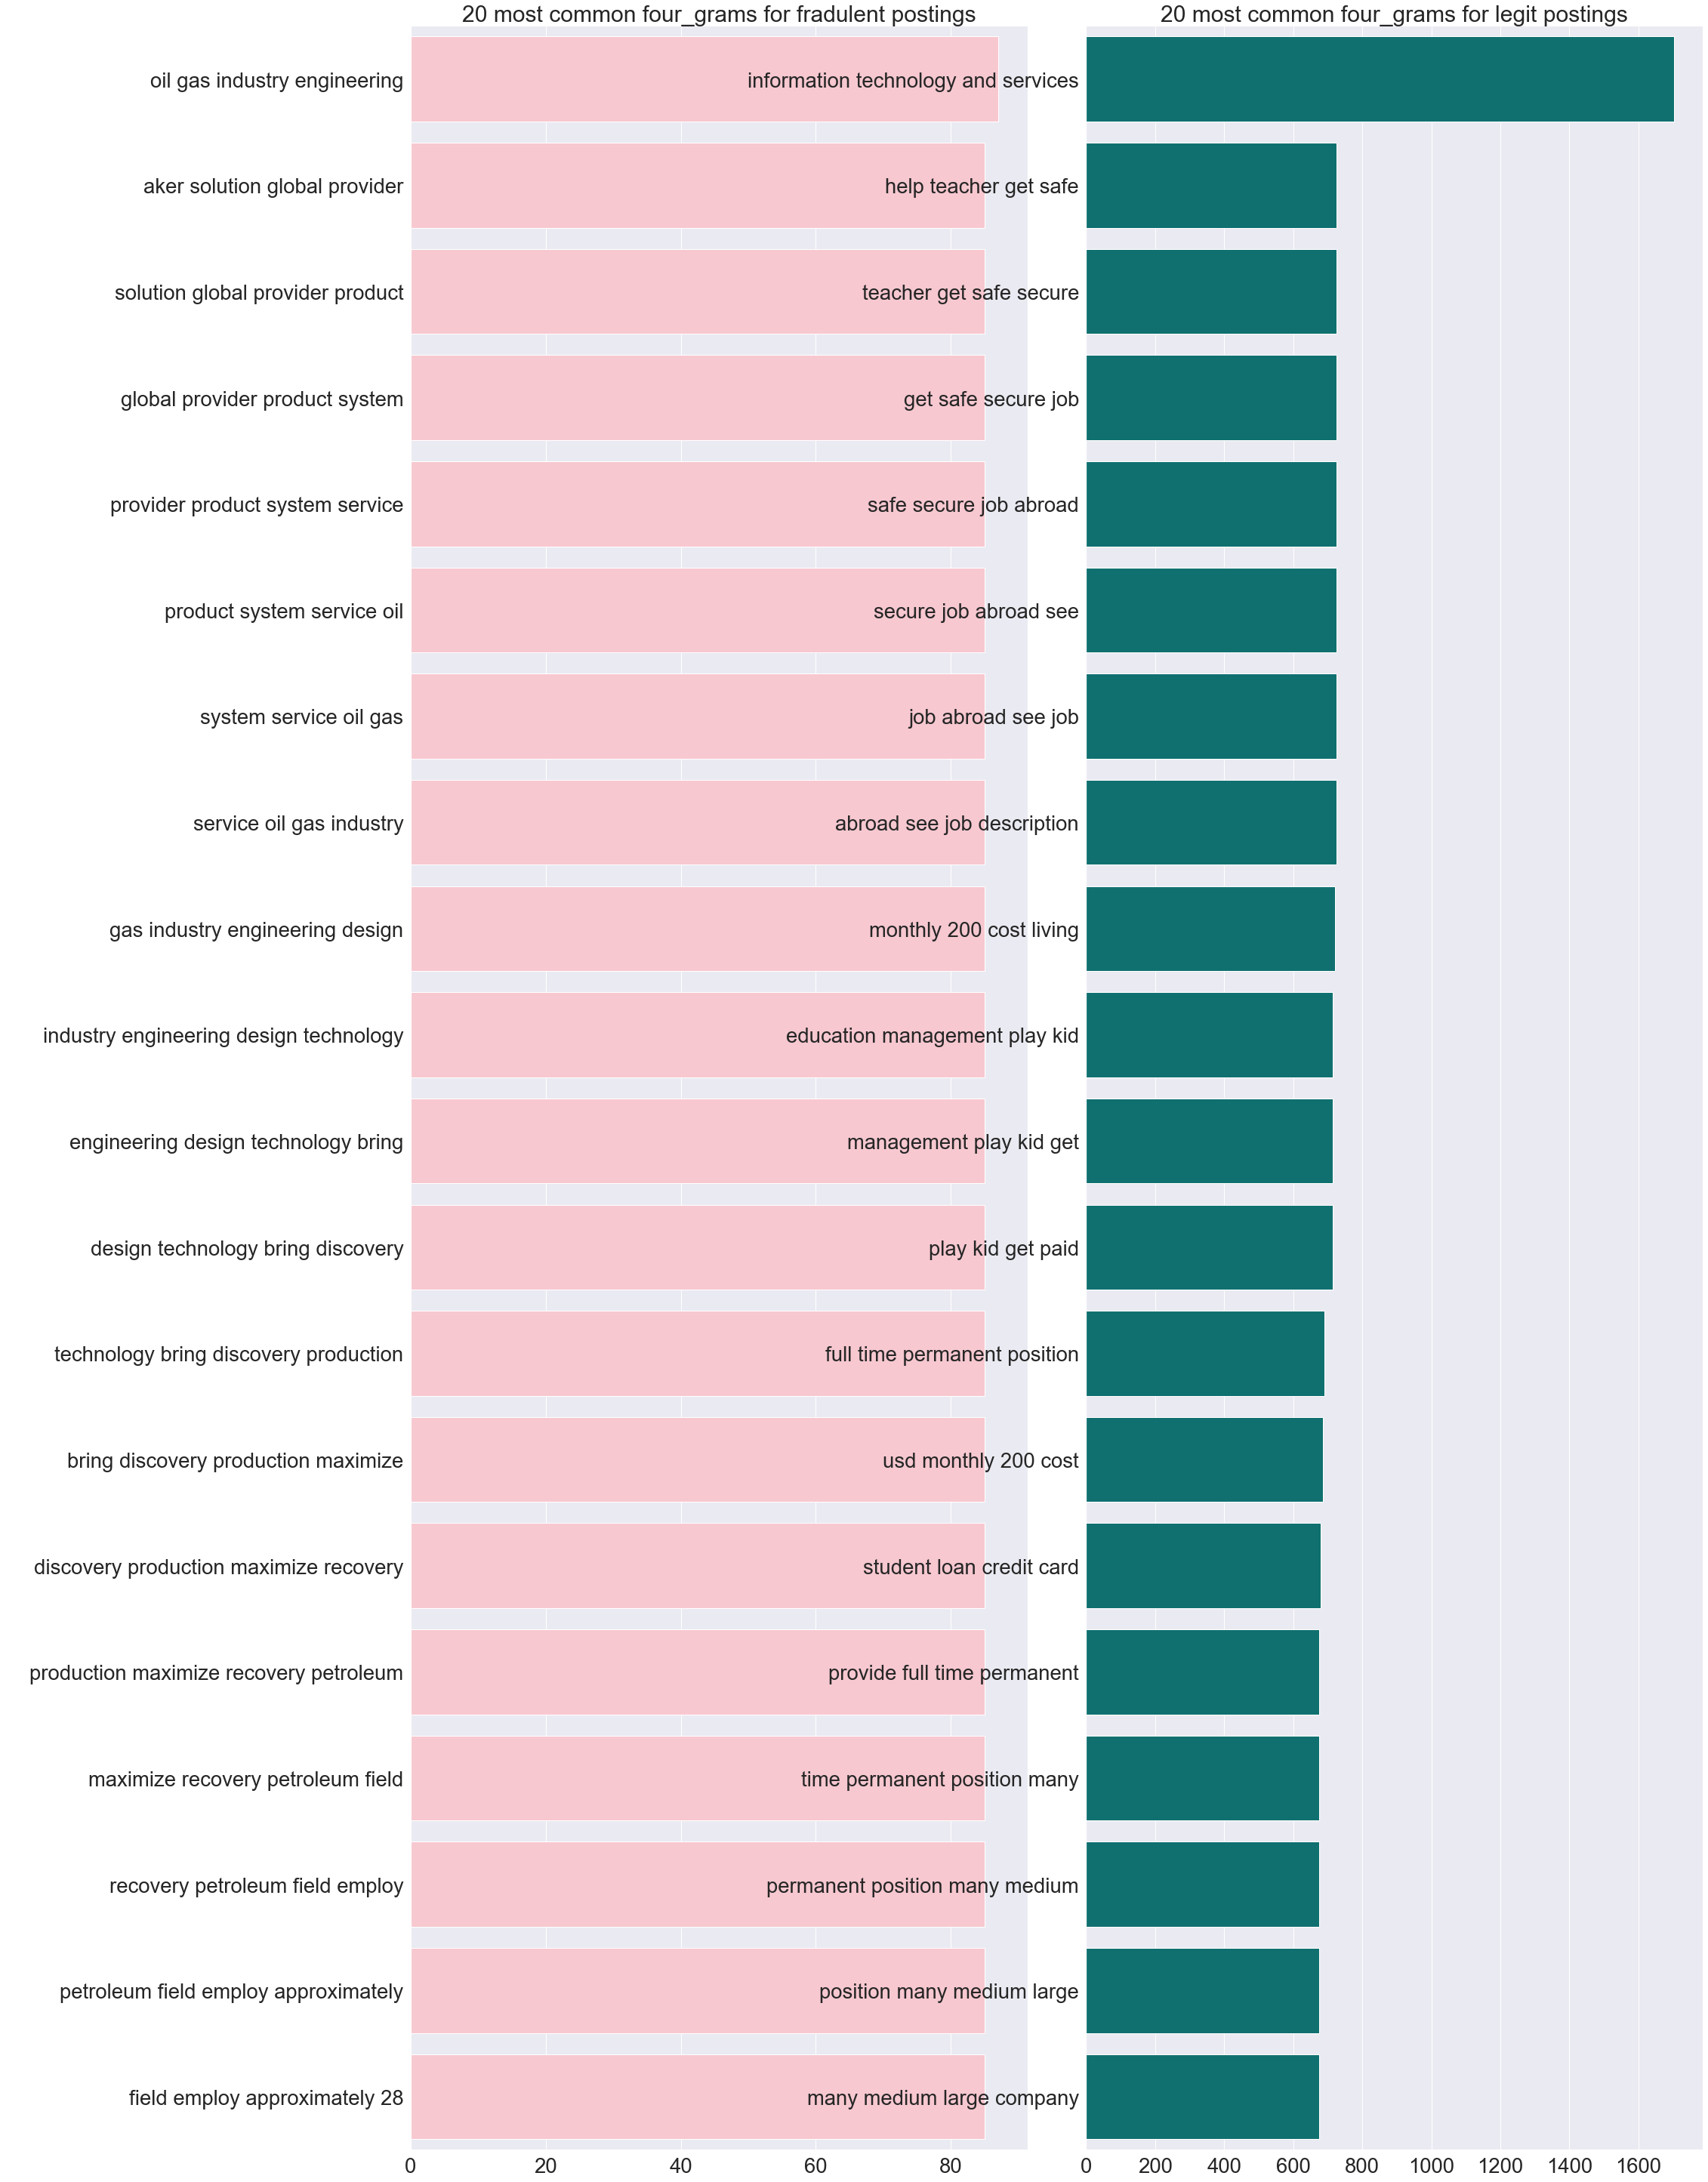

In [21]:
# 4-grams

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def four_grams(corpus, n=None):
    cv = CountVectorizer(ngram_range=(4, 4)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


fig, axes = plt.subplots(ncols=2, figsize=(25, 40))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.tight_layout()

top_fourgrams=four_grams(text_fraud)[:20]
x,y=map(list,zip(*top_fourgrams))
sns.barplot(x=y,y=x, ax=axes[0], color='pink')

top_fourgrams1=four_grams(text_legit)[:20]
x,y=map(list,zip(*top_fourgrams1))
sns.barplot(x=y,y=x, ax=axes[1], color='teal')
# 

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
# fig.subplots_adjust(wspace=2)

axes[0].set_title('20 most common four_grams for fradulent postings')
axes[1].set_title('20 most common four_grams for legit postings')

plt.show()

It can be seen from tri grams and 4 grams that there are few sequence of terms which are actually coming from the fraud job post. So, our analysis is making sense and we can figure out how the fraud job posts are framed utilizing fraud terms and bag of words.

# Word Cloud Analysis for Fraud and legit Job Postings

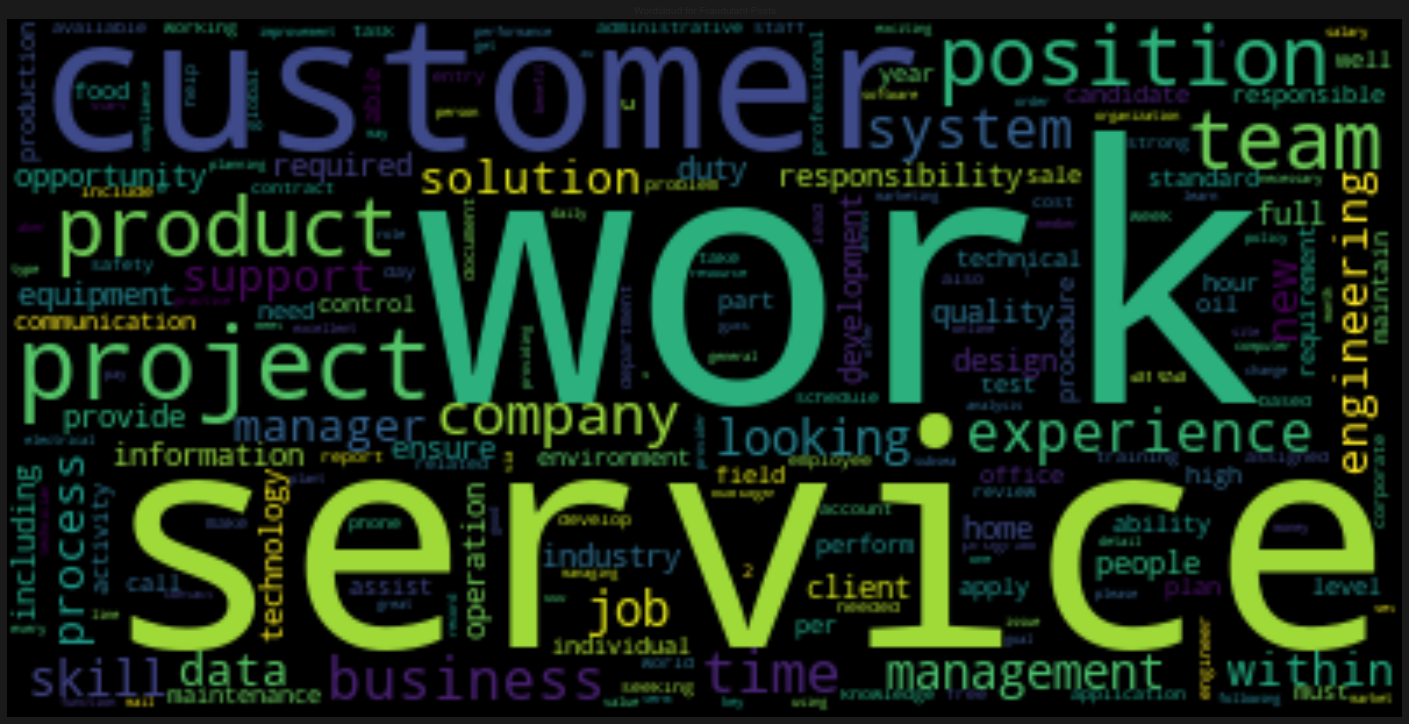

In [20]:
# looking at the frequency or importance of single words with high weightage among fraud and legit posts
# pip install wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import wordcloud
from wordcloud import WordCloud
from collections import Counter 
fraudword_count = Counter()

# we are displaying wordcloud for fraudulant job description only 
fraud['description'].apply(fraudword_count.update)
plt.figure(figsize=(25,30),facecolor='k')
wordcloud_all = WordCloud(max_words=200,background_color="black").generate_from_frequencies(fraudword_count)
plt.title("Wordcloud for Fraudulant Posts", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud_all,interpolation='bilinear')
plt.show()

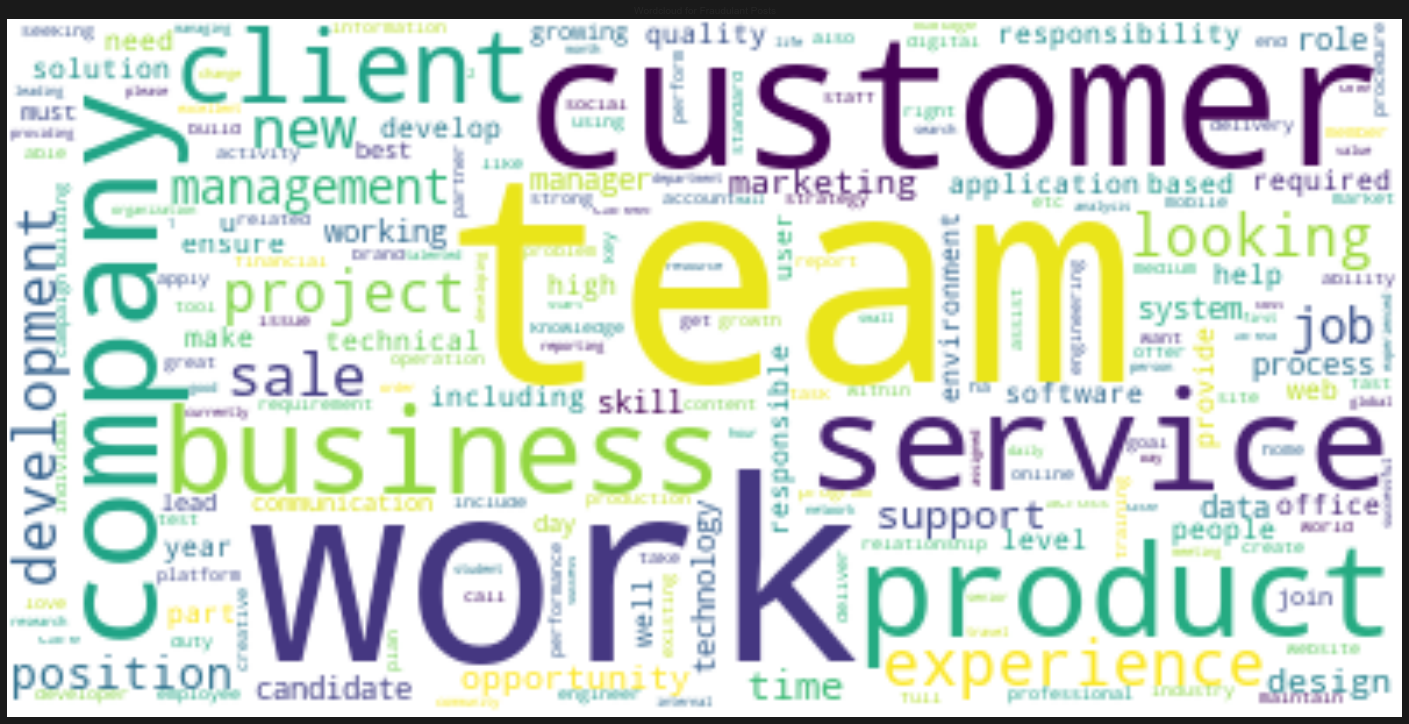

In [21]:
# we are displaying wordcloud for legit job description only 
legit['description'].apply(fraudword_count.update)
plt.figure(figsize=(25,30),facecolor='k')
wordcloud_all = WordCloud(max_words=200,background_color="white").generate_from_frequencies(fraudword_count)
plt.title("Wordcloud for Fraudulant Posts", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud_all,interpolation='bilinear')
plt.show()